In [1]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from datetime import datetime 
import requests #get request
import pandas as pd #pandas
import numpy as np #
import sqlite3
import matplotlib.pyplot as plt
import random 
import seaborn as sns


In [2]:
seattleCrime = pd.read_csv("SPD_Crime_Data__2008-Present.csv")

In [3]:
seattleCrime

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-04 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-02 21:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 02:21:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044121,12605097782,2020-02-04 22:41:00,NaN,2020-02-05 00:59:41,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,S,R,R1,NORTH BEACON HILL,25XX BLOCK OF 14TH AVE S,-122.314719,47.580248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874064,2013-247888,7687554356,2013-07-13 01:00:00,NaN,2013-07-13 06:37:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
874065,2013-227022,7682354808,2013-06-26 11:00:00,2013-06-29 06:30:00,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251
874066,2012-045494,7672915592,2012-02-14 15:04:00,NaN,2012-02-14 15:04:00,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
874067,2010-328592,7692227482,2010-09-19 16:59:00,NaN,2010-09-19 16:59:00,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [4]:
year=2020
list2020 = []
seattleCrime.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-04 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-02 21:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 02:21:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044121,12605097782,2020-02-04 22:41:00,NaN,2020-02-05 00:59:41,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,S,R,R1,NORTH BEACON HILL,25XX BLOCK OF 14TH AVE S,-122.314719,47.580248


In [5]:
print(len(seattleCrime[seattleCrime["Crime Against Category"] == "PROPERTY"]["Crime Against Category"]))

646658


In [6]:
uniqueSeattle=seattleCrime

In [7]:
arr=random.sample(range(0, 874068), 1000)
#print(arr)

In [8]:
uniqueSeattle=uniqueSeattle.reset_index()
uniqueSeattle

,index,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-04 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-02 21:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 02:21:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,4,2020-044121,12605097782,2020-02-04 22:41:00,NaN,2020-02-05 00:59:41,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,S,R,R1,NORTH BEACON HILL,25XX BLOCK OF 14TH AVE S,-122.314719,47.580248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874064,874064,2013-247888,7687554356,2013-07-13 01:00:00,NaN,2013-07-13 06:37:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
874065,874065,2013-227022,7682354808,2013-06-26 11:00:00,2013-06-29 06:30:00,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251
874066,874066,2012-045494,7672915592,2012-02-14 15:04:00,NaN,2012-02-14 15:04:00,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
874067,874067,2010-328592,7692227482,2010-09-19 16:59:00,NaN,2010-09-19 16:59:00,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [9]:
(seattleCrime['Crime Against Category']).unique()

array(['SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME'], dtype=object)

In [10]:
(seattleCrime['Offense Parent Group']).unique()

array(['DRUG/NARCOTIC OFFENSES', 'LARCENY-THEFT', 'ROBBERY',
       'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY',
       'DRIVING UNDER THE INFLUENCE', 'FRAUD OFFENSES',
       'KIDNAPPING/ABDUCTION', 'COUNTERFEITING/FORGERY',
       'PORNOGRAPHY/OBSCENE MATERIAL', 'EXTORTION/BLACKMAIL',
       'MOTOR VEHICLE THEFT', 'SEX OFFENSES', 'STOLEN PROPERTY OFFENSES',
       'EMBEZZLEMENT', 'WEAPON LAW VIOLATIONS', 'ARSON',
       'HUMAN TRAFFICKING', 'LIQUOR LAW VIOLATIONS', 'BAD CHECKS',
       'PROSTITUTION OFFENSES', 'FAMILY OFFENSES, NONVIOLENT',
       'CURFEW/LOITERING/VAGRANCY VIOLATIONS', 'ANIMAL CRUELTY',
       'HOMICIDE OFFENSES', 'PEEPING TOM', 'SEX OFFENSES, CONSENSUAL',
       'DRUNKENNESS', 'BRIBERY', 'GAMBLING OFFENSES',
       'TRESPASS OF REAL PROPERTY', 'ASSAULT OFFENSES',
       'BURGLARY/BREAKING&ENTERING'], dtype=object)

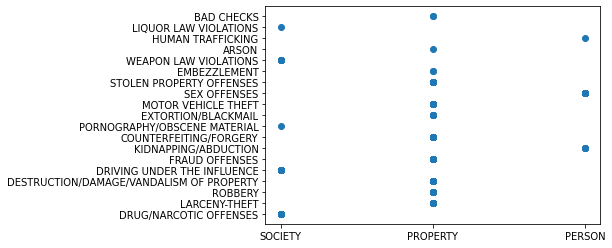

In [11]:
array_1=[]
array_2=[]
array_3=[]
for x in range(0,1000):
    array_1.append(seattleCrime.loc[x]['Offense Parent Group'])
    array_2.append(seattleCrime.loc[x]['Crime Against Category'])
    array_3.append(seattleCrime.loc[x]['Offense ID'])

plt.scatter(array_2,array_1)

In [12]:
seattleTidy = pd.read_csv("SPD_Crime_Data__2008-Present.csv")
seattleTidy.dropna(inplace=True)

In [13]:
seattleTidy=seattleTidy.drop("Offense End DateTime",axis=1)
seattleTidy

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
7,2020-044104,12605029468,2020-02-04 20:30:00,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
9,2020-044013,12605015456,2020-02-04 20:20:00,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874055,2020-307192,16779563026,2020-10-30 02:00:00,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317
874061,2019-223685,8335129478,2019-04-01 11:52:58,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970
874063,2014-122134,7699116275,2014-03-20 10:30:00,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030
874065,2013-227022,7682354808,2013-06-26 11:00:00,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251


In [14]:
seattleTidy.reset_index()

,index,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
1,2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
2,3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
3,7,2020-044104,12605029468,2020-02-04 20:30:00,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
4,9,2020-044013,12605015456,2020-02-04 20:20:00,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454355,874055,2020-307192,16779563026,2020-10-30 02:00:00,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317
454356,874061,2019-223685,8335129478,2019-04-01 11:52:58,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970
454357,874063,2014-122134,7699116275,2014-03-20 10:30:00,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030
454358,874065,2013-227022,7682354808,2013-06-26 11:00:00,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251


In [15]:
crimeCounts = sorted(seattleTidy["Offense Parent Group"].unique())
crimeCounts2=[]
temp_df = seattleTidy.copy()
index = 0

for ele in crimeCounts:
    crimeCounts2.append((ele, temp_df.groupby("Offense Parent Group").count()["Offense"][0:].values[index])) 
    index += 1

crimeCounts2 = sorted(crimeCounts2, key=lambda x: x[1], reverse = True)
crimeCounts2[0:10]

[('LARCENY-THEFT', 220201),
 ('BURGLARY/BREAKING&ENTERING', 62254),
 ('MOTOR VEHICLE THEFT', 45195),
 ('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 42639),
 ('FRAUD OFFENSES', 35439),
 ('ASSAULT OFFENSES', 24189),
 ('TRESPASS OF REAL PROPERTY', 5015),
 ('ROBBERY', 4056),
 ('DRUG/NARCOTIC OFFENSES', 3846),
 ('BAD CHECKS', 2916)]

In [16]:
top_5_crimes = crimeCounts2[0:5]
top_5_crimes

[('LARCENY-THEFT', 220201),
 ('BURGLARY/BREAKING&ENTERING', 62254),
 ('MOTOR VEHICLE THEFT', 45195),
 ('DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 42639),
 ('FRAUD OFFENSES', 35439)]

In [17]:
crimes = {}

for i in range(len(top_5_crimes)):
    crimes[top_5_crimes[i][0]] = []

for idx in seattleTidy.index: #GO THROUGH THE DATAFRAME
    t = seattleTidy.at[idx,"Offense Parent Group"] #CURRENT TYPE

    if t in crimes: #IF ITS A TOP CRIME TYPE
        hour = seattleTidy.at[idx,"Offense Start DateTime"]#STORE ITS HOUR
        #hour=hour[10:]
        crimes[t].append(hour) #APPEND THE HOUR TO ITS CORRESPONDING TYPE (WHICH IS THE KEY)          

#print(type(hour))
#for i in crimes:  
 #   crimes[i]=crimes[10:]
   
    # hist, bin_edges = np.histogram(crimes[i], bins=24)

 #   plt.hist(crimes[i],bins=24,color="blue",edgecolor='black', linewidth=1.2)
 #   plt.ylabel("Frequency of " + i)
  #  plt.xlabel("Hour of Day")
  #  plt.title(i + " happenings per Hour")
 #   plt.show()
    
    


In [18]:
crimes

{'LARCENY-THEFT': ['2020-02-03 08:00:00',
  '2020-02-04 21:00:00',
  '2020-02-04 07:30:00',
  '2020-02-03 08:00:00',
  '2020-02-03 21:00:00',
  '2020-01-29 18:00:00',
  '2020-02-04 11:20:00',
  '2020-02-03 00:00:00',
  '2020-02-04 12:11:00',
  '2020-02-03 09:00:00',
  '2020-02-02 18:00:00',
  '2020-01-29 00:01:00',
  '2020-02-03 21:00:00',
  '2020-02-03 22:00:00',
  '2020-02-03 21:30:00',
  '2020-02-03 20:00:00',
  '2020-02-04 02:00:00',
  '2020-02-03 18:00:00',
  '2020-02-03 21:06:00',
  '2020-02-03 18:23:00',
  '2020-01-26 07:00:00',
  '2020-01-31 23:57:00',
  '2020-01-28 07:00:00',
  '2020-02-03 13:20:00',
  '2020-02-03 16:45:00',
  '2020-01-26 00:00:00',
  '2020-02-03 04:00:00',
  '2020-02-03 14:34:00',
  '2020-01-27 00:00:00',
  '2020-02-02 17:15:00',
  '2020-02-03 12:51:00',
  '2020-01-17 21:18:00',
  '2020-02-03 11:20:00',
  '2020-01-28 22:35:00',
  '2020-02-03 01:25:00',
  '2020-01-02 00:00:00',
  '2020-01-13 10:00:00',
  '2020-02-03 09:00:00',
  '2020-01-31 03:30:00',
  '2020-

In [19]:
seattleCopy=seattleTidy

In [20]:
seattleCopy['Offense Start DateTime'] = pd.to_datetime(seattleTidy['Offense Start DateTime'], format='%Y/%m/%d')

In [21]:
seattleCopy

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
7,2020-044104,12605029468,2020-02-04 20:30:00,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
9,2020-044013,12605015456,2020-02-04 20:20:00,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874055,2020-307192,16779563026,2020-10-30 02:00:00,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317
874061,2019-223685,8335129478,2019-04-01 11:52:58,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970
874063,2014-122134,7699116275,2014-03-20 10:30:00,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030
874065,2013-227022,7682354808,2013-06-26 11:00:00,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251


In [22]:
Second=seattleCopy
Second

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
7,2020-044104,12605029468,2020-02-04 20:30:00,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
9,2020-044013,12605015456,2020-02-04 20:20:00,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874055,2020-307192,16779563026,2020-10-30 02:00:00,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317
874061,2019-223685,8335129478,2019-04-01 11:52:58,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970
874063,2014-122134,7699116275,2014-03-20 10:30:00,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030
874065,2013-227022,7682354808,2013-06-26 11:00:00,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251


In [23]:
ts =Second['Offense Start DateTime']
ts

1        2020-02-03 08:00:00
2        2020-02-02 20:30:00
3        2020-02-05 01:17:00
7        2020-02-04 20:30:00
9        2020-02-04 20:20:00
                 ...        
874055   2020-10-30 02:00:00
874061   2019-04-01 11:52:58
874063   2014-03-20 10:30:00
874065   2013-06-26 11:00:00
874068   2010-02-25 18:00:00
Name: Offense Start DateTime, Length: 454360, dtype: datetime64[ns]

In [24]:
print(type(ts))

<class 'pandas.core.series.Series'>


In [25]:
#ts2 = pd.to_datetime(str(Second['Offense Start DateTime'])) 
#d = ts2.strftime('%Y.%m.%d')
#d

In [26]:
#ts.astype(str).str[:10]
#ts
ts=ts.dt.strftime('%Y-%m-%d')

In [27]:
ts

1         2020-02-03
2         2020-02-02
3         2020-02-05
7         2020-02-04
9         2020-02-04
             ...    
874055    2020-10-30
874061    2019-04-01
874063    2014-03-20
874065    2013-06-26
874068    2010-02-25
Name: Offense Start DateTime, Length: 454360, dtype: object

In [28]:
print(type(ts))

<class 'pandas.core.series.Series'>


In [29]:
Second

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
7,2020-044104,12605029468,2020-02-04 20:30:00,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
9,2020-044013,12605015456,2020-02-04 20:20:00,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874055,2020-307192,16779563026,2020-10-30 02:00:00,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317
874061,2019-223685,8335129478,2019-04-01 11:52:58,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970
874063,2014-122134,7699116275,2014-03-20 10:30:00,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030
874065,2013-227022,7682354808,2013-06-26 11:00:00,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251


In [30]:
Second=Second.drop("Offense Start DateTime",axis=1)
Second

,Report Number,Offense ID,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
1,2020-044452,12605598696,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
7,2020-044104,12605029468,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
9,2020-044013,12605015456,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874055,2020-307192,16779563026,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317
874061,2019-223685,8335129478,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970
874063,2014-122134,7699116275,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030
874065,2013-227022,7682354808,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251


In [31]:
Second["Offense Start DateTime"]=ts
Second

,Report Number,Offense ID,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Offense Start DateTime
1,2020-044452,12605598696,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020-02-03
2,2020-044465,12605567653,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020-02-02
3,2020-044225,12605174036,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020-02-05
7,2020-044104,12605029468,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527,2020-02-04
9,2020-044013,12605015456,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564,2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874055,2020-307192,16779563026,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317,2020-10-30
874061,2019-223685,8335129478,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970,2019-04-01
874063,2014-122134,7699116275,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030,2014-03-20
874065,2013-227022,7682354808,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013-06-26


In [32]:
third=Second
third

,Report Number,Offense ID,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Offense Start DateTime
1,2020-044452,12605598696,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020-02-03
2,2020-044465,12605567653,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020-02-02
3,2020-044225,12605174036,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020-02-05
7,2020-044104,12605029468,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527,2020-02-04
9,2020-044013,12605015456,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564,2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874055,2020-307192,16779563026,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317,2020-10-30
874061,2019-223685,8335129478,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970,2019-04-01
874063,2014-122134,7699116275,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030,2014-03-20
874065,2013-227022,7682354808,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013-06-26


In [33]:
crimes2 = {}

for i in range(len(top_5_crimes)):
    crimes2[top_5_crimes[i][0]] = []

for idx in third.index: #GO THROUGH THE DATAFRAME
    t = third.at[idx,"Offense Parent Group"] #CURRENT TYPE

    if t in crimes2: #IF ITS A TOP CRIME TYPE
        hour = third.at[idx,"Offense Start DateTime"]#STORE ITS HOUR
        #hour=hour[10:]
        crimes2[t].append(hour) 


In [34]:
crimes2

{'LARCENY-THEFT': ['2020-02-03',
  '2020-02-04',
  '2020-02-04',
  '2020-02-03',
  '2020-02-03',
  '2020-01-29',
  '2020-02-04',
  '2020-02-03',
  '2020-02-04',
  '2020-02-03',
  '2020-02-02',
  '2020-01-29',
  '2020-02-03',
  '2020-02-03',
  '2020-02-03',
  '2020-02-03',
  '2020-02-04',
  '2020-02-03',
  '2020-02-03',
  '2020-02-03',
  '2020-01-26',
  '2020-01-31',
  '2020-01-28',
  '2020-02-03',
  '2020-02-03',
  '2020-01-26',
  '2020-02-03',
  '2020-02-03',
  '2020-01-27',
  '2020-02-02',
  '2020-02-03',
  '2020-01-17',
  '2020-02-03',
  '2020-01-28',
  '2020-02-03',
  '2020-01-02',
  '2020-01-13',
  '2020-02-03',
  '2020-01-31',
  '2020-02-03',
  '2020-02-02',
  '2020-01-30',
  '2020-01-31',
  '2020-02-02',
  '2019-11-15',
  '2020-02-03',
  '2020-01-05',
  '2020-02-03',
  '2020-02-02',
  '2020-02-02',
  '2020-02-03',
  '2020-02-03',
  '2020-01-25',
  '2020-01-31',
  '2020-02-02',
  '2020-02-02',
  '2020-02-02',
  '2020-02-02',
  '2020-01-31',
  '2020-02-02',
  '2020-01-31',
  '2020

In [35]:
Thirdy=seattleTidy
Thirdy

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
7,2020-044104,12605029468,2020-02-04 20:30:00,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
9,2020-044013,12605015456,2020-02-04 20:20:00,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874055,2020-307192,16779563026,2020-10-30 02:00:00,2020-10-30 09:59:22,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,N,N,N2,BITTERLAKE,140XX BLOCK OF LINDEN AVE N,-122.347755,47.730317
874061,2019-223685,8335129478,2019-04-01 11:52:58,2019-06-19 13:50:53,A,PROPERTY,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,220,W,D,D3,SLU/CASCADE,12XX BLOCK OF HARRISON ST,-122.331070,47.621970
874063,2014-122134,7699116275,2014-03-20 10:30:00,2014-04-21 15:02:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,D,D2,QUEEN ANNE,27XX BLOCK OF WESTLAKE AVE N,-122.347302,47.645030
874065,2013-227022,7682354808,2013-06-26 11:00:00,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251


In [36]:
time1=Thirdy['Offense Start DateTime']
time1

1        2020-02-03 08:00:00
2        2020-02-02 20:30:00
3        2020-02-05 01:17:00
7        2020-02-04 20:30:00
9        2020-02-04 20:20:00
                 ...        
874055   2020-10-30 02:00:00
874061   2019-04-01 11:52:58
874063   2014-03-20 10:30:00
874065   2013-06-26 11:00:00
874068   2010-02-25 18:00:00
Name: Offense Start DateTime, Length: 454360, dtype: datetime64[ns]

In [37]:
print(type(time1))

<class 'pandas.core.series.Series'>


In [38]:
df_tidied = pd.read_csv("SPD_Crime_Data__2008-Present.csv")
df_tidied.dropna(inplace=True)
time_format = "%Y-%m-%d %H:%M:%S"

for idx in df_tidied.index:
    piInString=str(df_tidied.at[idx,"Offense Start DateTime"])
    df_tidied.at[idx,"Offense Start DateTime"] = datetime.strptime(piInString,time_format)
    df_tidied.at[idx,"Report DateTime"] = datetime.strptime(df_tidied.at[idx,"Report DateTime"],time_format)

df_tidied.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-04 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-02 21:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 02:21:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
7,2020-044104,12605029468,2020-02-04 20:30:00,2020-02-04 20:45:00,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
9,2020-044013,12605015456,2020-02-04 20:20:00,2020-02-04 20:35:00,2020-02-04 22:28:09,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,U,U1,SANDPOINT,RAVENNA AVE NE / NE 95TH ST,-122.304891,47.697564
